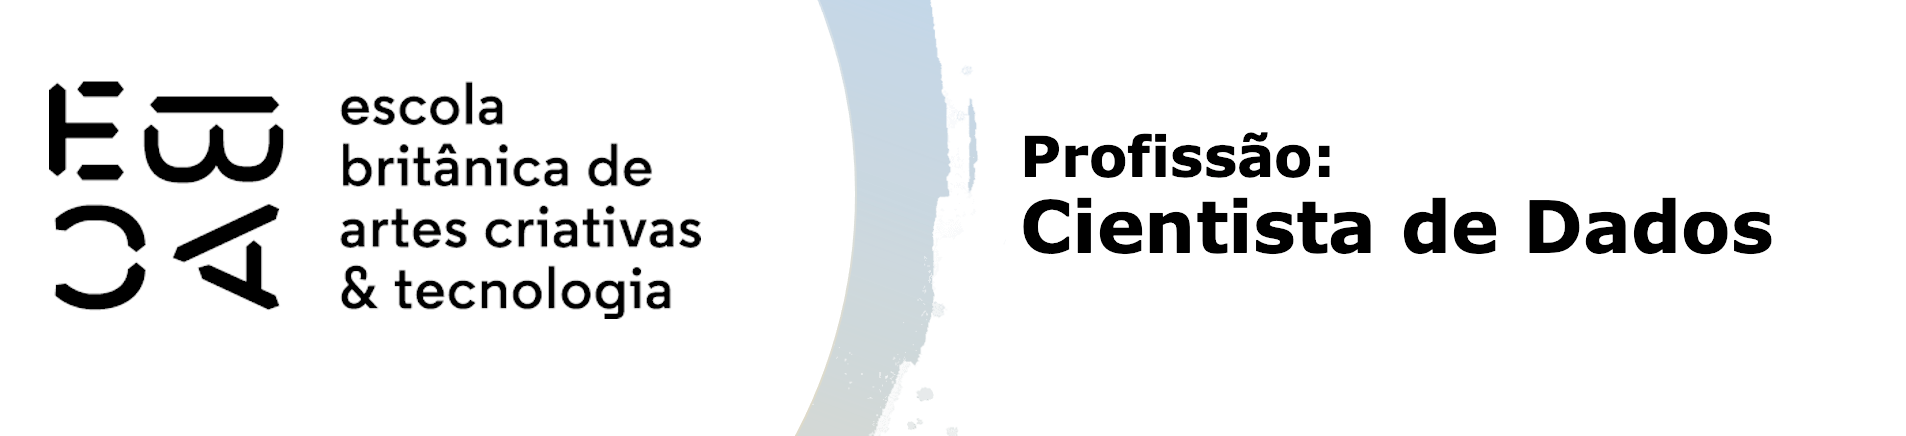

# Métodos hierárquicos de agrupamento - Tarefa

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [4]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [21]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)
clus.fit(peng_pad)
peng_num['grupo'] = clus.labels_

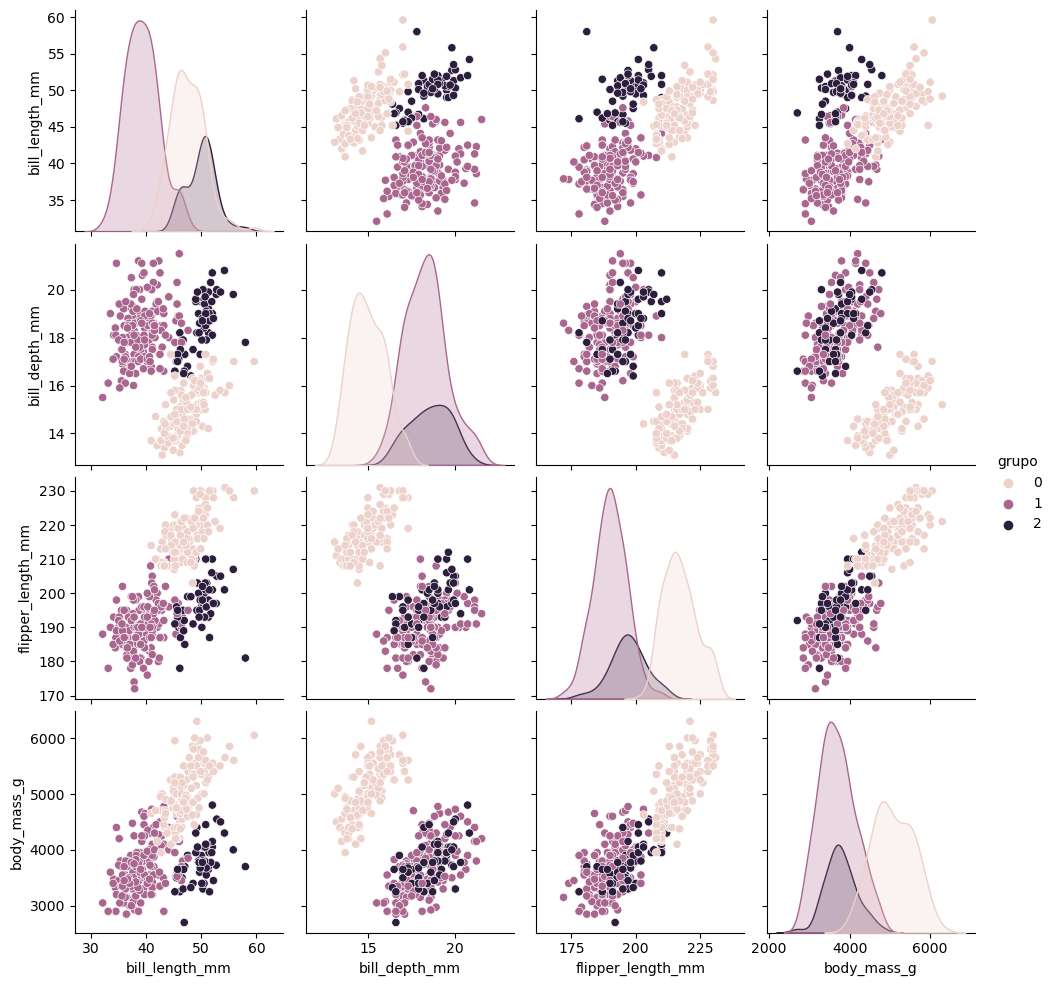

In [20]:
sns.pairplot(data=peng_num, hue='grupo')

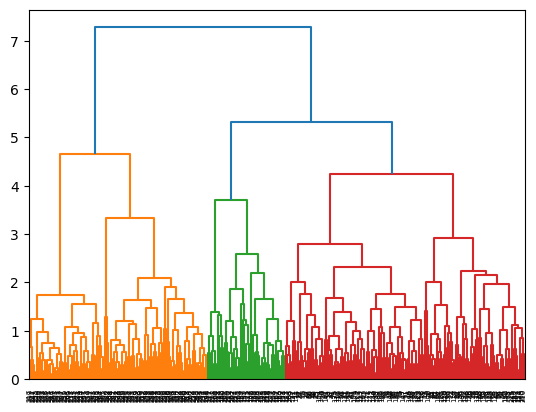

In [14]:
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [ ]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [24]:
pd.crosstab(peng['species'], peng_num['grupo'])

grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [43]:
colunas = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
peng.groupby(['species'])[colunas].mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [47]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)
clus.fit(peng_pad)
peng_num['grupo'] = clus.labels_

In [50]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

In [65]:
pd.crosstab(peng['species'], peng_num['grupo'])

grupo,0,1,2,3,4,5
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [64]:
pd.crosstab([peng['species'],peng['sex']], peng_num['grupo'])

grupo              0   1   2   3   4   5
species   sex                           
Adelie    Female   0  69   4   0   0   0
          Male     0  18  55   0   0   0
Chinstrap Female   0   5   9   0  20   0
          Male     0   0   0   0  22  12
Gentoo    Female   9   0   0  49   0   0
          Male    61   0   0   0   0   0

Ao agrupar os dados com 6 grupos, percebe-se um indício de que, com exceção do grupo 4, há uma clusterização em sexo logo após a separação da base de dados conforme as espécies dos penguins.